In [1]:
cd

C:\Users\kdot3


In [2]:
cd Downloads/

C:\Users\kdot3\Downloads


In [3]:
# External libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from CBFV import composition
import seaborn as sns

# User functions
from gallego import get_gallego_enthalpy

# In-built libraries
import os
SEP = os.sep

low_memory = False

df = pd.read_csv("ae.csv")

print(f"df shape: {df.shape}")

df.head()


df shape: (63, 5)


,Composition,Temp. (°C),Stress(MPa),Stress exponent,Activation Energy
0,V4Cr4Ti,700.00,250.0,4.0,262.0
1,Ti46Al2W0.5Si,699.85,220.0,7.3,405.0
2,Ti46Al2W0.5Si,650.00,200.0,7.3,405.0
3,Ti23Al27Nb,650.00,310.0,7.0,346.0
4,Ti22Al20Nb2W,650.00,310.0,7.0,368.0


In [4]:

df_cbfv = df[["Composition", "Activation Energy"]].copy()
df_cbfv.columns = ["formula", "target"]
df_cbfv.head()

,formula,target
0,V4Cr4Ti,262.0
1,Ti46Al2W0.5Si,405.0
2,Ti46Al2W0.5Si,405.0
3,Ti23Al27Nb,346.0
4,Ti22Al20Nb2W,368.0


In [5]:
x_cbfv, y_cbfv, formula_cbfv, _ = composition.generate_features(df_cbfv, elem_prop='oliynyk')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

x_cbfv.head(5)

Processing Input Data: 100%|████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 31502.28it/s]


	Featurizing Compositions...


Assigning Features...: 100%|████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 11290.91it/s]

	Creating Pandas Objects...


,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,avg_Atomic_Radius,avg_Miracle_Radius_[pm],avg_Covalent_Radius,avg_Zunger_radii_sum,avg_ionic_radius,avg_crystal_radius,avg_Pauling_Electronegativity,avg_MB_electonegativity,avg_Gordy_electonegativity,avg_Mulliken_EN,avg_Allred-Rockow_electronegativity,avg_metallic_valence,avg_number_of_valence_electrons,avg_gilmor_number_of_valence_electron,avg_valence_s,avg_valence_p,avg_valence_d,avg_valence_f,avg_Number_of_unfilled_s_valence_electrons,avg_Number_of_unfilled_p_valence_electrons,avg_Number_of_unfilled_d_valence_electrons,avg_Number_of_unfilled_f_valence_electrons,avg_outer_shell_electrons,avg_1st_ionization_potential_(kJ/mol),avg_polarizability(A^3),avg_Melting_point_(K),avg_Boiling_Point_(K),avg_Density_(g/mL),avg_specific_heat_(J/g_K)_,avg_heat_of_fusion_(kJ/mol)_,avg_heat_of_vaporization_(kJ/mol)_,avg_thermal_conductivity_(W/(m_K))_,avg_heat_atomization(kJ/mol),avg_Cohesive_energy,dev_Atomic_Number,dev_Atomic_Weight,dev_Period,dev_group,dev_families,dev_Metal,dev_Nonmetal,dev_Metalliod,dev_Mendeleev_Number,dev_l_quantum_number,dev_Atomic_Radius,dev_Miracle_Radius_[pm],dev_Covalent_Radius,dev_Zunger_radii_sum,dev_ionic_radius,dev_crystal_radius,dev_Pauling_Electronegativity,dev_MB_electonegativity,dev_Gordy_electonegativity,dev_Mulliken_EN,dev_Allred-Rockow_electronegativity,dev_metallic_valence,dev_number_of_valence_electrons,dev_gilmor_number_of_valence_electron,dev_valence_s,dev_valence_p,dev_valence_d,dev_valence_f,dev_Number_of_unfilled_s_valence_electrons,dev_Number_of_unfilled_p_valence_electrons,dev_Number_of_unfilled_d_valence_electrons,dev_Number_of_unfilled_f_valence_electrons,dev_outer_shell_electrons,dev_1st_ionization_potential_(kJ/mol),dev_polarizability(A^3),dev_Melting_point_(K),dev_Boiling_Point_(K),dev_Density_(g/mL),dev_specific_heat_(J/g_K)_,dev_heat_of_fusion_(kJ/mol)_,dev_heat_of_vaporization_(kJ/mol)_,dev_thermal_conductivity_(W/(m_K))_,dev_heat_atomization(kJ/mol),dev_Cohesive_energy,range_Atomic_Number,range_Atomic_Weight,range_Period,range_group,range_families,range_Metal,range_Nonmetal,range_Metalliod,range_Mendeleev_Number,range_l_quantum_number,range_Atomic_Radius,range_Miracle_Radius_[pm],range_Covalent_Radius,range_Zunger_radii_sum,range_ionic_radius,range_crystal_radius,range_Pauling_Electronegativity,range_MB_electonegativity,range_Gordy_electonegativity,range_Mulliken_EN,range_Allred-Rockow_electronegativity,range_metallic_valence,range_number_of_valence_electrons,range_gilmor_number_of_valence_electron,range_valence_s,range_valence_p,range_valence_d,range_valence_f,range_Number_of_unfilled_s_valence_electrons,range_Number_of_unfilled_p_valence_electrons,range_Number_of_unfilled_d_valence_electrons,range_Number_of_unfilled_f_valence_electrons,range_outer_shell_electrons,range_1st_ionization_potential_(kJ/mol),range_polarizability(A^3),range_Melting_point_(K),range_Boiling_Point_(K),range_Density_(g/mL),range_specific_heat_(J/g_K)_,range_heat_of_fusion_(kJ/mol)_,range_heat_of_vaporization_(kJ/mol)_,range_thermal_conductivity_(W/(m_K))_,range_heat_atomization(kJ/mol),range_Cohesive_energy,max_Atomic_Number,max_Atomic_Weight,max_Period,max_group,max_families,max_Metal,max_Nonmetal,max_Metalliod,max_Mendeleev_Number,max_l_quantum_number,max_Atomic_Radius,max_Miracle_Radius_[pm],max_Covalent_Radius,max_Zunger_radii_sum,max_ionic_radius,max_crystal_radius,max_Pauling_Electronegativity,max_MB_electonegativity,max_Gordy_electonegativity,max_Mulliken_EN,max_Allred-Rockow_electronegativity,max_metallic_valence,max_number_of_valence_electrons,max_gilmor_number_of_valence_electron,max_valence_s,max_valence_p,max_valence_d,max_valence_f,max_Number_of_unfilled_s_valence_electrons,max_Number_of_unfilled_p_valence_electrons,max_Number_of_unfilled_d_valence_electrons,max_Number_of_unfilled_f_valence_electrons,max_outer_shell_electrons,max_1st_ionization_poten

In [6]:
feats_from_cbfv = ["avg_Atomic_Number","mode_heat_of_fusion_(kJ/mol)_","mode_Density_(g/mL)","avg_Pauling_Electronegativity","avg_Atomic_Weight",  "avg_Atomic_Radius","mode_polarizability(A^3)","mode_heat_of_vaporization_(kJ/mol)_", "mode_heat_atomization(kJ/mol)"]

In [7]:
x_feats = x_cbfv.copy()[feats_from_cbfv]
x_feats.head()

,avg_Atomic_Number,mode_heat_of_fusion_(kJ/mol)_,mode_Density_(g/mL),avg_Pauling_Electronegativity,avg_Atomic_Weight,avg_Atomic_Radius,mode_polarizability(A^3),mode_heat_of_vaporization_(kJ/mol)_,mode_heat_atomization(kJ/mol)
0,23.333333,16.90,6.11,1.633333,51.070044,1.693333,11.6,344.3,397.0
1,22.000000,15.45,4.54,1.558384,48.009062,1.725152,14.6,421.0,470.0
2,22.000000,15.45,4.54,1.558384,48.009062,1.725152,14.6,421.0,470.0
3,17.607843,10.79,2.70,1.578235,37.698979,1.457255,8.3,293.4,326.0
4,20.000000,15.45,4.54,1.592000,43.614301,1.515778,14.6,421.0,470.0


In [8]:
xmin = np.amin(x_feats, axis=0); #storing min of each column
xmax = np.amax(x_feats, axis=0); #storing max of each column

xmin.to_csv(f"j{SEP}xmin1.csv"); #saving x_min values
xmax.to_csv(f"j{SEP}xmax1.csv"); #saving x_max values

x_feats_norm = (x_feats - xmin)/(xmax - xmin) #min-max normalization
x_feats_norm.head()

,avg_Atomic_Number,mode_heat_of_fusion_(kJ/mol)_,mode_Density_(g/mL),avg_Pauling_Electronegativity,avg_Atomic_Weight,avg_Atomic_Radius,mode_polarizability(A^3),mode_heat_of_vaporization_(kJ/mol)_,mode_heat_atomization(kJ/mol)
0,0.461499,0.159170,0.535907,0.664784,0.415357,0.964326,0.631730,0.589174,0.437610
1,0.449261,0.145331,0.398170,0.650623,0.403895,0.974261,0.807097,0.721737,0.565905
2,0.449261,0.145331,0.398170,0.650623,0.403895,0.974261,0.807097,0.721737,0.565905
3,0.408945,0.100856,0.236746,0.654374,0.365288,0.890611,0.438826,0.501201,0.312830
4,0.430903,0.145331,0.398170,0.656974,0.387438,0.908885,0.807097,0.721737,0.565905


<Axes: >

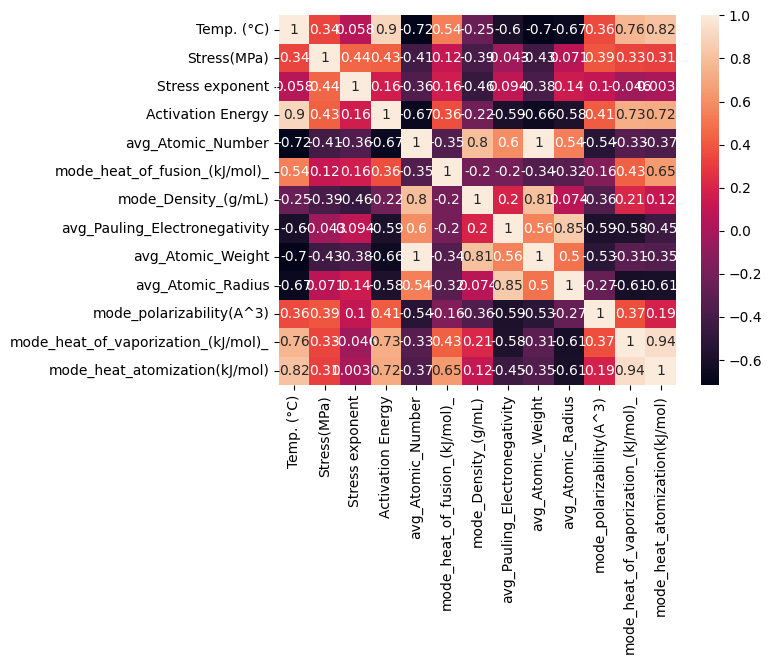

In [9]:
df_with_norm_feats = x_feats_norm.copy()
df_with_norm_feats = pd.concat([df, df_with_norm_feats], axis=1)

corr_mat = df_with_norm_feats.drop(["Composition"], axis=1).corr(method="pearson")
sns.heatmap(corr_mat, annot=True)

In [10]:
df_with_norm_feats.to_csv(f"j{SEP}df_with_norm_feats12.csv")

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

import pickle
import os
SEP = os.sep
random_state = 0
df = pd.read_csv(f"j{SEP}df_with_norm_feats12.csv").sample(frac=1, random_state=random_state, ignore_index=True)
df.head()

,Unnamed: 0,Composition,Temp. (°C),Stress(MPa),Stress exponent,Activation Energy,avg_Atomic_Number,mode_heat_of_fusion_(kJ/mol)_,mode_Density_(g/mL),avg_Pauling_Electronegativity,avg_Atomic_Weight,avg_Atomic_Radius,mode_polarizability(A^3),mode_heat_of_vaporization_(kJ/mol)_,mode_heat_atomization(kJ/mol)
0,43,Mg3.56Al0.56Si0.27Mn,125.0,70.0,14.40,165.00,0.381483,0.083333,0.152525,0.623578,0.338165,0.883538,0.573274,0.214297,0.000000
1,49,Mg,276.5,50.0,5.50,170.00,0.357471,0.083333,0.152525,0.603691,0.315133,0.888346,0.573274,0.214297,0.000000
2,62,Ti6Al4V,700.0,120.0,1.53,238.13,0.420055,0.145331,0.398170,0.653505,0.375997,0.917868,0.807097,0.721737,0.565905
3,51,Mg,426.5,50.0,4.50,105.00,0.357471,0.083333,0.152525,0.603691,0.315133,0.888346,0.573274,0.214297,0.000000
4,32,Mg8.65Gd6.61Zn0.0023Fe0.0002Ni0.0050Cu,250.0,70.0,7.60,93.00,0.561078,0.083333,0.152525,0.602144,0.526510,1.000000,0.573274,0.214297,0.000000


In [28]:
y_prop = "Activation Energy"
feat_names = ["Temp. (°C)","Unnamed: 0", "Stress(MPa)","Stress exponent","avg_Atomic_Number","mode_heat_of_fusion_(kJ/mol)_","mode_Density_(g/mL)","avg_Pauling_Electronegativity","avg_Atomic_Weight",  "avg_Atomic_Radius","mode_polarizability(A^3)","mode_heat_of_vaporization_(kJ/mol)_", "mode_heat_atomization(kJ/mol)"]

X = df[feat_names]
y = df[y_prop]
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (63, 13)
Y shape: (63,)


In [29]:
rf_regressor = RandomForestRegressor(n_estimators= 1000) 

In [30]:
k = 9  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_score = float('-inf')  
best_model = None

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_regressor.fit(X_train, y_train)
    
    score = rf_regressor.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = rf_regressor

print("Best R2 score:", best_score)


best_model.fit(X, y)

Best R2 score: 0.9564052301104975


RandomForestRegressor(n_estimators=1000)

In [15]:
y_pred = best_model.predict(X)

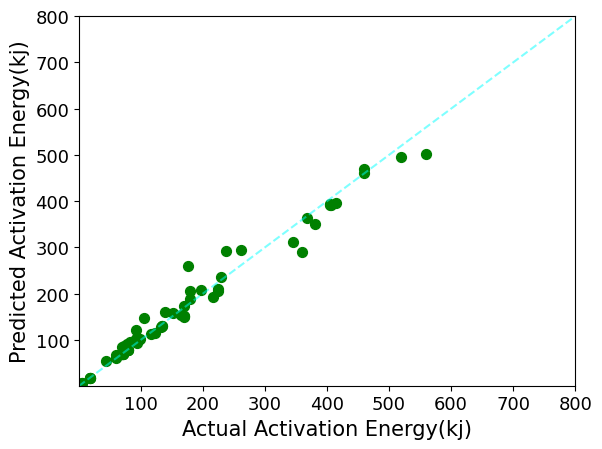

In [16]:
plt.scatter(y , y_pred, c="green", s=50)
plt.plot([0, 800], [0, 800], "--", c="cyan", alpha=0.5)
plt.xlabel("Actual Activation Energy(kj)", fontsize=15)
plt.ylabel("Predicted Activation Energy(kj)", fontsize=15)
plt.xlim(1, 800)
plt.ylim(1, 800)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [19]:
import shap

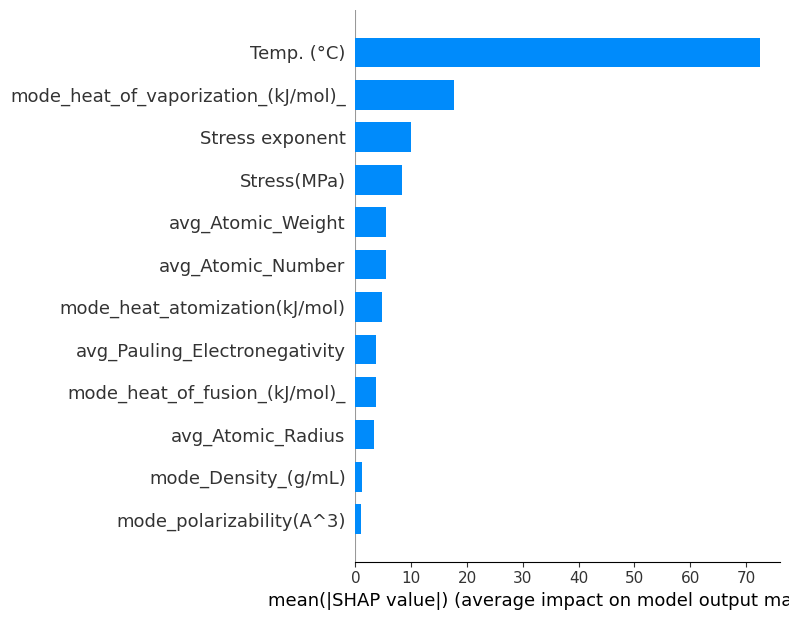

In [18]:
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type='bar')